<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# pip install keras

In [2]:
# pip install tensorflow

In [3]:
# insert code here
## Import libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import keras
import tensorflow as tf
from tensorflow.keras import Input

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [4]:
# insert code here
# The diabetes dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()

### Prepare input data

In [5]:
# insert code here
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
X = diabetes.data
Y = diabetes.target

In [7]:
diabetes.data[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [8]:
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

### Split the data (training/test)

In [9]:
# insert code here
# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Optional: Convert to DataFrame for easier manipulation
diabetes_df_train = pd.DataFrame(data=X_train, columns=diabetes.feature_names)
diabetes_df_train['target'] = Y_train

diabetes_df_test = pd.DataFrame(data=X_test, columns=diabetes.feature_names)
diabetes_df_test['target'] = Y_test

# Display the first few rows of the training set
print(diabetes_df_train.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.070769  0.050680  0.012117  0.056301  0.034206  0.049416 -0.039719   
1 -0.009147  0.050680 -0.018062 -0.033213 -0.020832  0.012152 -0.072854   
2  0.005383 -0.044642  0.049840  0.097615 -0.015328 -0.016345 -0.006584   
3 -0.027310 -0.044642 -0.035307 -0.029770 -0.056607 -0.058620  0.030232   
4 -0.023677 -0.044642 -0.065486 -0.081413 -0.038720 -0.053610  0.059685   

         s4        s5        s6  target  
0  0.034309  0.027364 -0.001078   144.0  
1  0.071210  0.000272  0.019633   150.0  
2 -0.002592  0.017036 -0.013504   280.0  
3 -0.039493 -0.049872 -0.129483   125.0  
4 -0.076395 -0.037129 -0.042499    59.0  


### Create the model's architecture

In [10]:
model = Sequential()

In [11]:
# Add the first hidden layer
model.add(Input(shape=((X.shape[1],))))

model.add(Dense(8, activation = 'relu', input_dim = X_train.shape[1]))

# Add the second hidden layer
model.add(Dense(4, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

C:\Users\Vinitha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model

In [13]:
# insert code here

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [14]:
%%time
# insert code here
history = model.fit(
    X_train,
    Y_train,
    validation_split = 0.25,
    batch_size = 32,
    epochs = 100,
    verbose = 1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 31950.3359 - mse: 31950.3359 - val_loss: 25305.2695 - val_mse: 25305.2695
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33176.5898 - mse: 33176.5898 - val_loss: 25298.3516 - val_mse: 25298.3516
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30546.3262 - mse: 30546.3262 - val_loss: 25288.8320 - val_mse: 25288.8320
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28852.9883 - mse: 28852.9883 - val_loss: 25275.7070 - val_mse: 25275.7070
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33030.4375 - mse: 33030.4375 - val_loss: 25259.2949 - val_mse: 25259.2949
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30865.0645 - mse: 30865.0645 - val_loss: 25241.4746 - val_mse: 25241.4746
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30429.2578 - mse: 30429.2578 - val_loss: 25222.4473 - val_mse: 25222.4473
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30513.7969 - mse: 30513.7

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27114.0156 - mse: 27114.0156 - val_loss: 22241.5723 - val_mse: 22241.5723
Epoch 51/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28199.0449 - mse: 28199.0449 - val_loss: 22099.7422 - val_mse: 22099.7422
Epoch 52/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30138.7344 - mse: 30138.7344 - val_loss: 21955.8633 - val_mse: 21955.8633
Epoch 53/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26742.0742 - mse: 26742.0742 - val_loss: 21811.0273 - val_mse: 21811.0273
Epoch 54/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26074.3438 - mse: 26074.3438 - val_loss: 21660.7832 - val_mse: 21660.7832
Epoch 55/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27863.4980 - mse: 27863.4980 - val_loss: 21505.7266 - val_mse: 21505.7266
Epoch 56/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27085.9609 - mse: 27085.9609 - val_loss: 21347.7070 - val_mse: 21347.7070
Epoch 57/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26746.7383 - mse: 26746.73

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16203.2793 - mse: 16203.2793 - val_loss: 12360.3330 - val_mse: 12360.3330
Epoch 100/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15106.8936 - mse: 15106.8936 - val_loss: 12135.0615 - val_mse: 12135.0615
CPU times: total: 4.8 s
Wall time: 14.8 s


### Create predictions

In [15]:
# insert code here
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [19]:
predictions_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred.flatten()})

### Evaluate the model

In [20]:
# insert code here
score = model.evaluate(X_test, Y_test, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12713.3750 - mse: 12713.3750

Test loss: 12713.375000, Test accuracy: 12713.375000


In [21]:
test_loss, test_mae = model.evaluate(X_test, Y_test)

# Print the evaluation results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13816.4082 - mse: 13816.4082
Test Loss: 12713.3750
Test MAE: 12713.3750


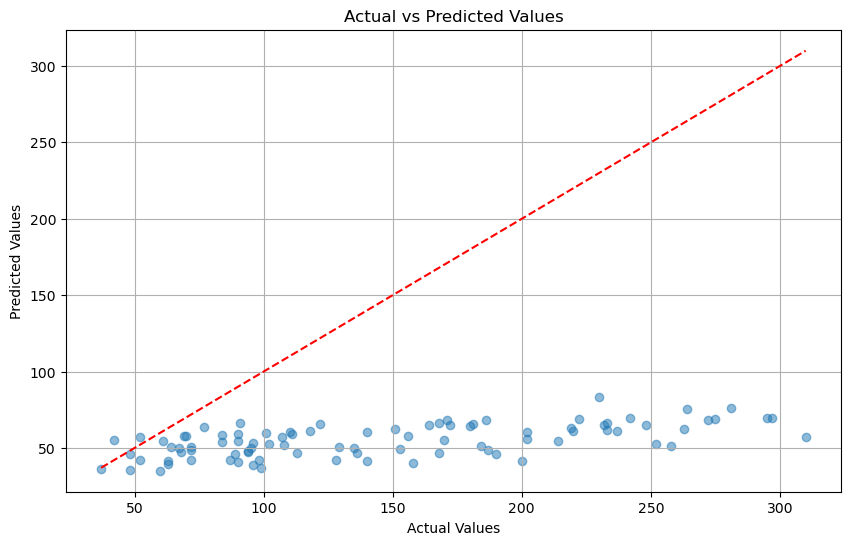

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'], alpha=0.5)
plt.plot([predictions_df['Actual'].min(), predictions_df['Actual'].max()], 
         [predictions_df['Actual'].min(), predictions_df['Actual'].max()], 
         color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


### Visualisation of cost

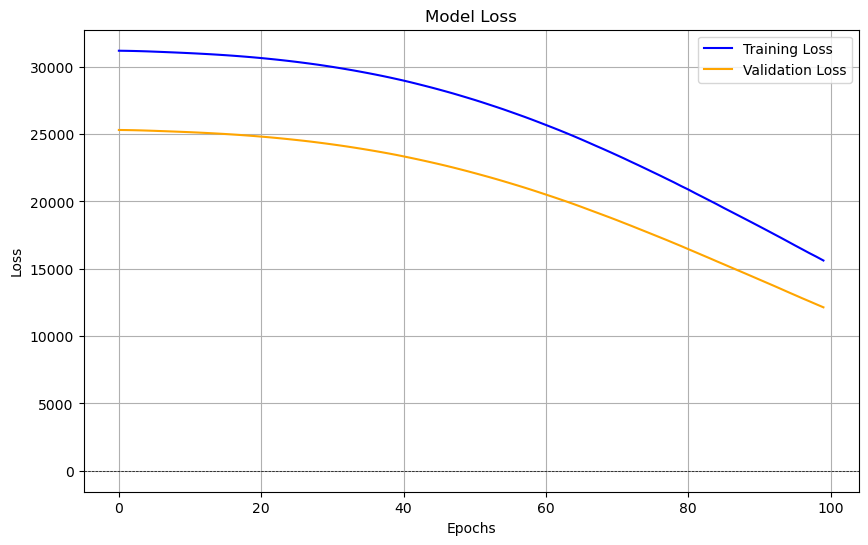

In [23]:
# insert code here

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

### Visualisation of residuals

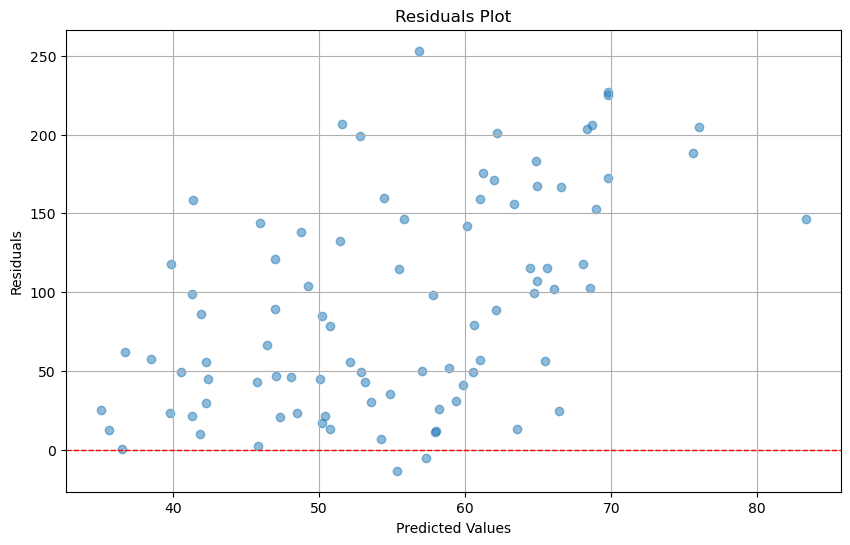

In [24]:
# insert code here
predictions_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred.flatten()})

# Calculate residuals
predictions_df['Residuals'] = predictions_df['Actual'] - predictions_df['Predicted']

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df['Predicted'], predictions_df['Residuals'], alpha=0.5)
plt.axhline(0, color='red', linewidth=1, ls='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

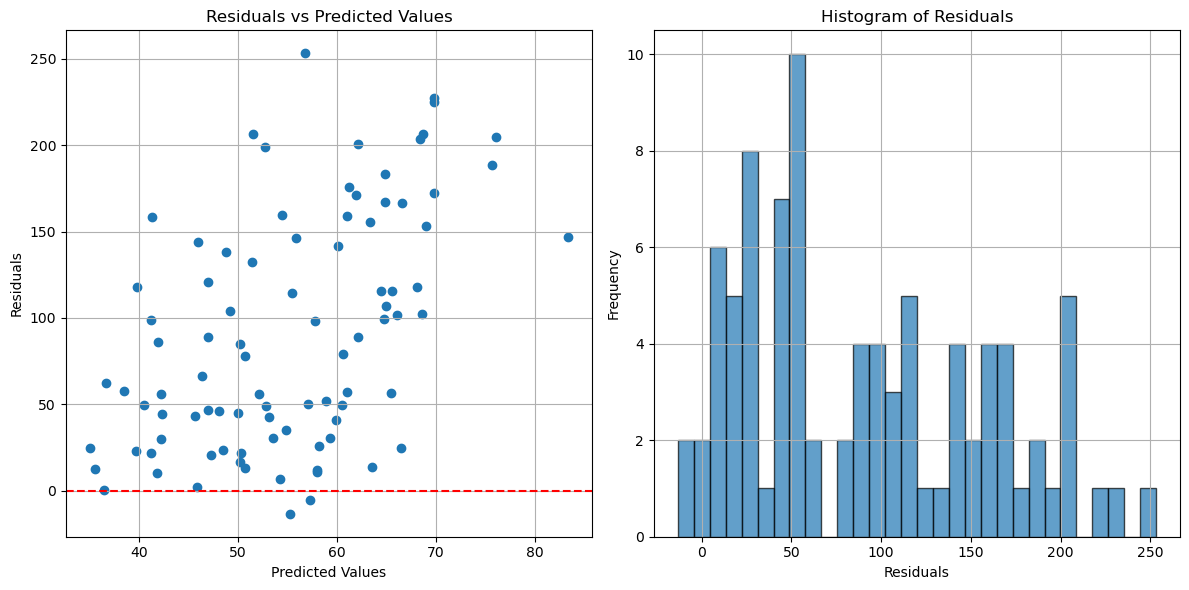

In [25]:
# Calculate residuals
residuals = Y_test - y_pred.flatten()

# Plotting residuals
plt.figure(figsize=(12, 6))

# Scatter plot of residuals
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Line at y=0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



